# Nieuwe sectie

In [3]:
#import necesseary modules
import numpy as np
import matplotlib.pyplot as plt
from matplotlib.pylab import rcParams
from pylab import rcParams
import warnings
import itertools
warnings.filterwarnings("ignore") # specify to ignore warning messages
import sys
import pandas as pd
import requests
import html5lib
import re
import bs4
import datetime
from datetime import date, timedelta
from bs4 import BeautifulSoup
import csv
import os
from google.colab import drive
from google.colab import data_table
data_table.enable_dataframe_formatter()
from vega_datasets import data
import glob
from scipy.stats import pearsonr
import scipy
import scipy.stats
from scipy.stats import t
import plotly.graph_objects as go
import plotly.express as px
import seaborn as sns
from functools import reduce
pd.set_option("display.max_rows", None, "display.max_columns", None)
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


Now that we imported the necesseary modules, let's start making the code by downloading the csv files

In [6]:
#download csv files
df_co2_emissions= pd.read_csv("/content/drive/MyDrive/csv files/co-emissions-per-capita (1).csv")
#rename columns to make it more easy to use
df_co2_emissions= df_co2_emissions.rename(columns={"Annual CO₂ emissions (per capita)": "Emissions"})
#remove column drop
df_co2_emissions.drop(columns=['Code'], inplace= True)

In [7]:
#create a new dataframe
df_emissions_2000 = df_co2_emissions[df_co2_emissions["Year"] == 2000].rename(columns={"Emissions": "2000"}).drop(columns="Year")
df_emissions_2021 = df_co2_emissions[df_co2_emissions["Year"] == 2021].rename(columns={"Emissions": "2021"}).drop(columns="Year")

In [8]:
#merge files
df_emissions_2000_2021 = df_emissions_2000.merge(df_emissions_2021, how="outer", on="Entity")
df_emissions_2000_2021.head()

,Entity,2000,2021
0,Afghanistan,0.053581,0.296119
1,Africa,1.082720,1.041408
2,Albania,0.950629,1.618066
3,Algeria,2.671715,3.989977
4,Andorra,7.924738,5.728626


In [9]:
#set_index dataframe
# setting entity as index but permanently
df_emissions_2000_2021.set_index("Entity", inplace=True)

In [10]:
#percentage change
df_emissions_2000_2021["Change %"] = (df_emissions_2000_2021["2021"] - df_emissions_2000_2021["2000"]) / df_emissions_2000_2021["2000"] * 100
df_emissions_2000_2021.head(50)

,2000,2021,Change %
Entity,,,
Afghanistan,0.053581,0.296119,452.659207
Africa,1.082720,1.041408,-3.815622
Albania,0.950629,1.618066,70.210104
Algeria,2.671715,3.989977,49.341458
Andorra,7.924738,5.728626,-27.712108
Angola,0.580458,0.619141,6.664326
Anguilla,7.942914,9.173204,15.489152
Antigua and Barbuda,3.904622,5.027352,28.753862
Argentina,3.840178,4.117966,7.233733


In [11]:
#find top 10 countries making the most strides co2 emissions
df_co2_strides = df_emissions_2000_2021.sort_values(by=['Change %']).head(25)
df_co2_strides

,2000,2021,Change %
Entity,,,
Curacao,34.984684,9.686285,-72.312784
Aruba,26.683304,8.054269,-69.815323
Syria,3.095552,1.266193,-59.096370
Venezuela,6.217110,2.827908,-54.514113
Singapore,11.938545,5.471561,-54.168943
Yemen,0.778030,0.378289,-51.378626
Macao,3.775098,1.874077,-50.356876
Denmark,10.168425,5.052223,-50.314599
Malta,6.280515,3.273186,-47.883478


In [12]:
#drop two columns
df_plot_strides = df_co2_strides.drop(columns=["2000", "2021"])
df_plot_strides.head(25)

,Change %
Entity,
Curacao,-72.312784
Aruba,-69.815323
Syria,-59.096370
Venezuela,-54.514113
Singapore,-54.168943
Yemen,-51.378626
Macao,-50.356876
Denmark,-50.314599
Malta,-47.883478


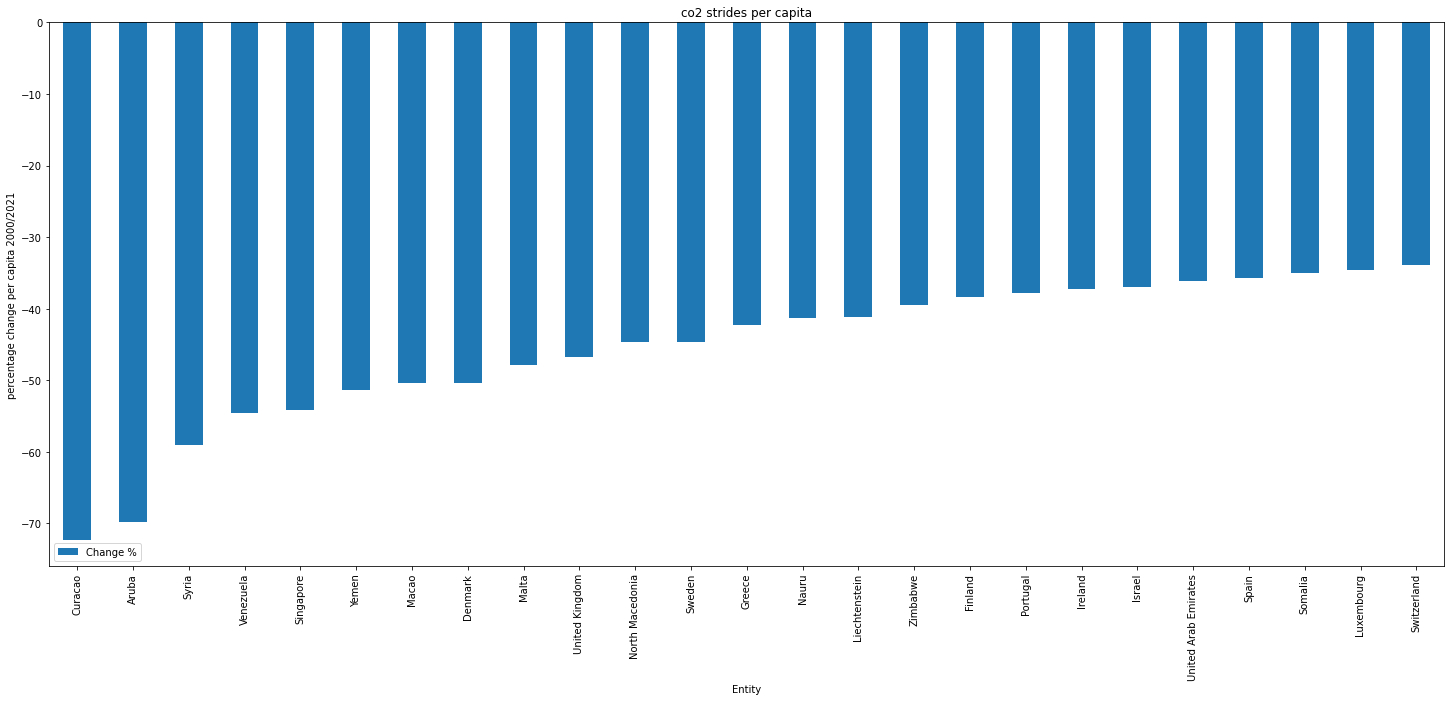

In [13]:
#plot that shows the countries who produce the most strides against co2 emissions output
df_plot_strides.plot(title = "co2 strides per capita", xlabel= 'Entity', ylabel='percentage change per capita 2000/2021', kind = "bar", figsize = (25,10))
plt.legend()

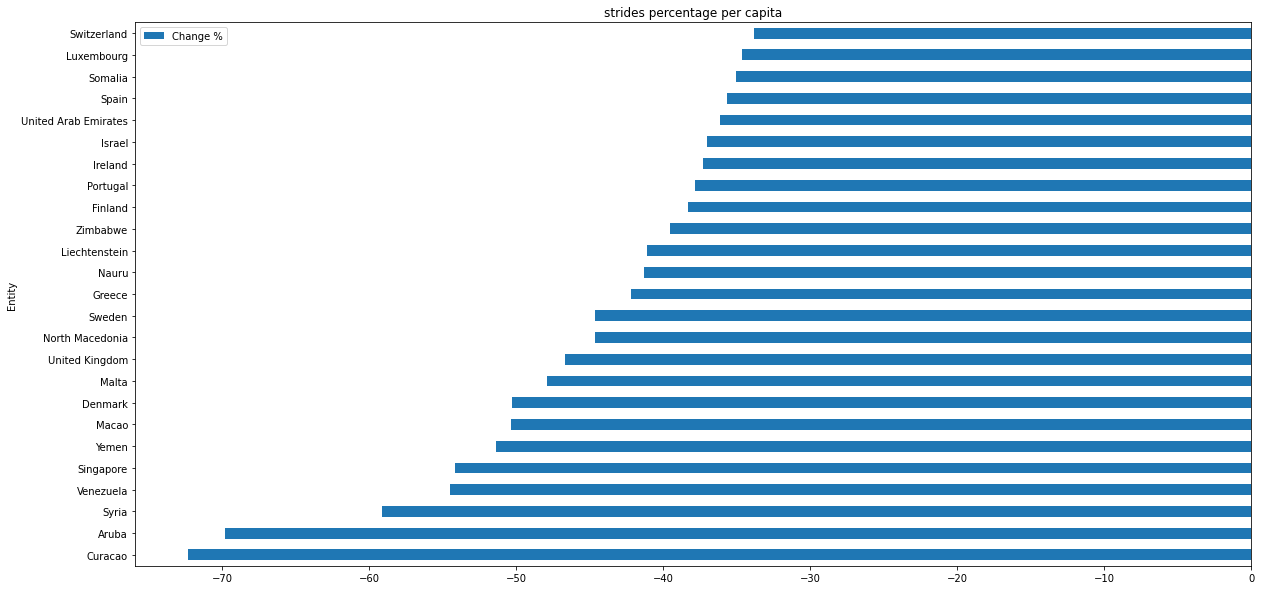

In [14]:
# also make a  bar chart using matplotlib
df_plot_strides.plot(
    xlabel = 'Entity',
    ylabel = 'percentage per capita',
    kind = 'barh',
    figsize = (20,10),
    stacked = True,
    title = 'strides percentage per capita',
    mark_right = True)

In [ ]:
#conclusion is that you do see that allot of countries do do there best to reduce co2 emissions and if you see the plot clearly the change over 21 years